In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('./Ph4')
from Postprocessing import pharmacophore_postprocess
from Validation import pharmacophore_validation
from Autoresult import autoph4result
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Database
dekois = pd.read_csv("DEKOIS_data.csv").drop(['Unnamed: 0'], axis = 1)
data = pd.read_csv("./Data/cover9/haaa_1.txt")

In [4]:
# 1. Check postprocess
postprocess = pharmacophore_postprocess(data = data, model ='haaa_1', ID = 'ID', ref=dekois, 
                                 scores = 'rmsd', rescore = 'minmax')
postprocess.fit()
postprocess.df

,ID,Active,SMILES,predict,scores,haaa_1_rescore
0,Active_1,1,O=C(O)C(=O)CC(=O)c1cccc(Cc2ccccc2)c1,1.0,0.282363,0.787368
1,Active_2,1,CN(C)CC(=O)N1CCN(C)C(c2nc(C(=O)NCc3ccc(F)cc3)c...,1.0,0.567355,0.475852
2,Active_3,1,CC(=O)N1CCN(C)C(c2nc(C(=O)NCc3ccc(F)cc3)c(O)c(...,1.0,0.567355,0.475852
3,Active_4,1,CCN1CCOCC1c1nc(C(=O)NCc2ccc(F)cc2)c(O)c(=O)n1C,1.0,0.567355,0.475852
4,Active_5,1,CN1CC[C@@H](O)C[C@H]1c1nc(C(=O)NCc2ccc(F)cc2)c...,1.0,0.567355,0.475852
...,...,...,...,...,...,...
29831,DEKOIS-29246,0,CCN1COC(Cn2cccc(NC(=O)CCCc3cc(C(=O)Nc4cc(C)cc(...,0.0,1.002690,0.000000
29832,DEKOIS-29247,0,Cc1ccc(C)c(NC(=O)CN(Cc2ccc(-c3ccc(C(F)F)cc3)o2...,1.0,0.449965,0.604168
29833,DEKOIS-29248,0,CCCn1nccc1NC(=O)c1ccc(Oc2cc(OC(F)C(=O)c3ccc(C)...,1.0,0.144751,0.937787
29834,DEKOIS-29249,0,COCc1ccc(OC)cc1NC(=O)c1nn(-c2ccc(F)cc2C)c2c1CN...,1.0,0.258179,0.813803


,Model,Sensitivity,Specificity,Precision,AP,AUCROC,logAUCROC,BedROC,EF1%,RIE
0,haaa_1,0.809,0.421,0.027,0.019,0.542,0.132,1.0,0.171,1.567


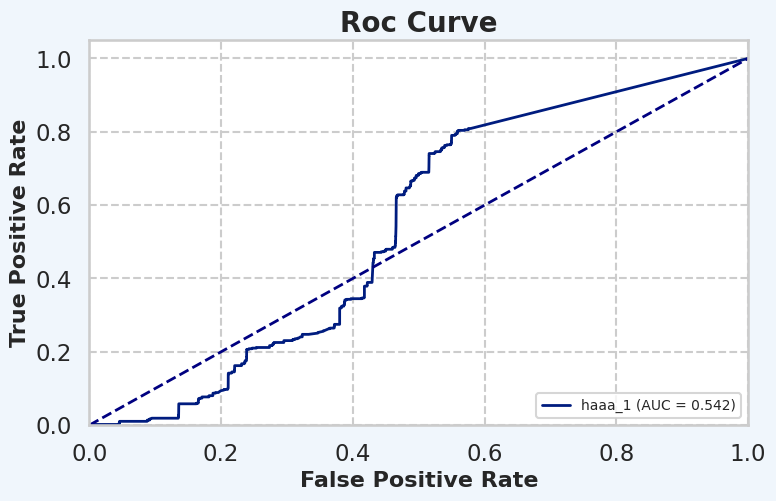

In [5]:
# 2. Check validation
ph4 = pharmacophore_validation(data = postprocess.df, active = "Active", predict = "predict",
                               scores = "haaa_1_rescore", model ='haaa_1', auc_thresh = 0.5, plottype='auc', figsize =(8.5,5))
ph4.validation()
ph4.table.head()

In [7]:
# 3.Check automation
import os
dekois =  pd.read_csv('DEKOIS_data.csv').drop(['Unnamed: 0'], axis = 1)
path = os.getcwd() + '/Data/'

cover5 result
cover6 result
cover7 result
cover8 result
cover9 result


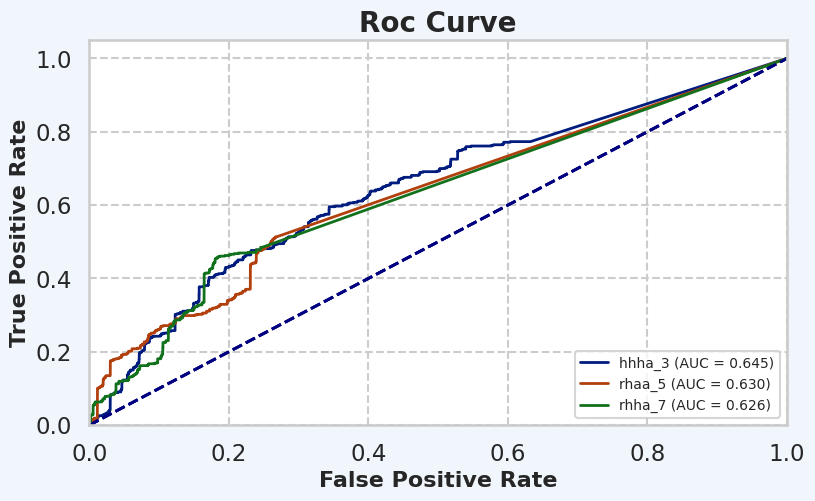

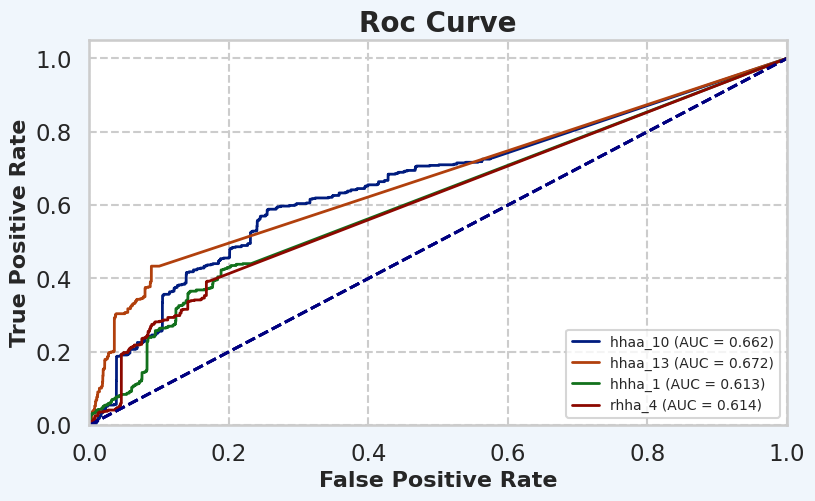

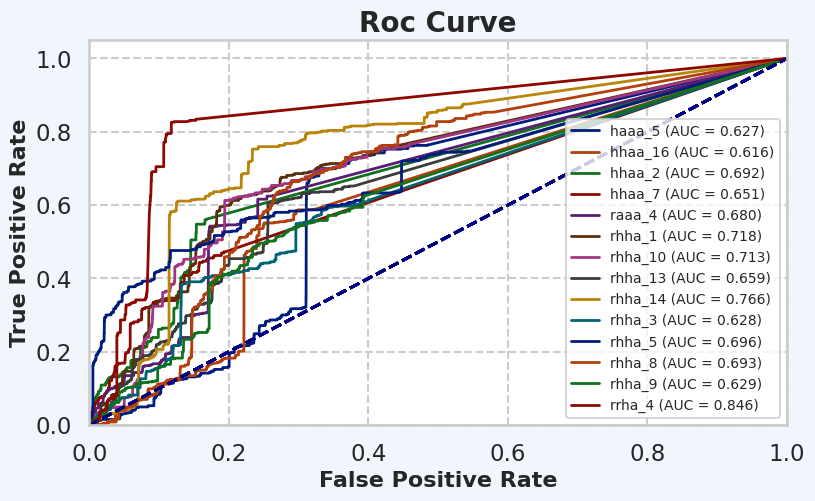

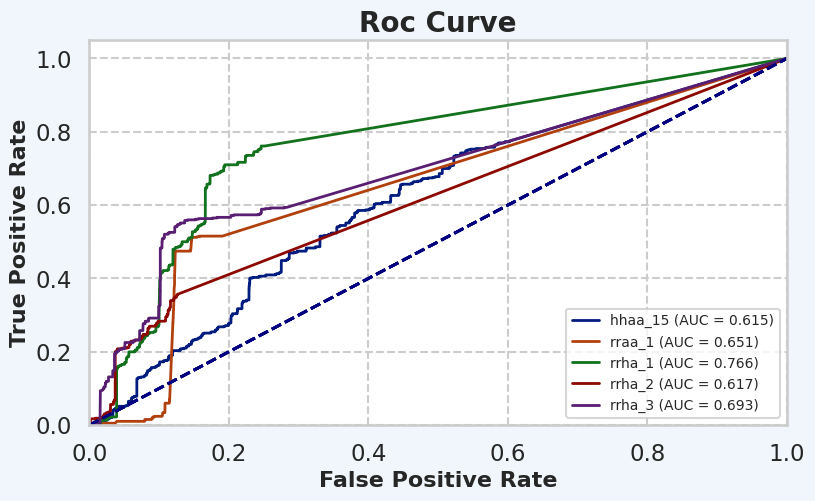

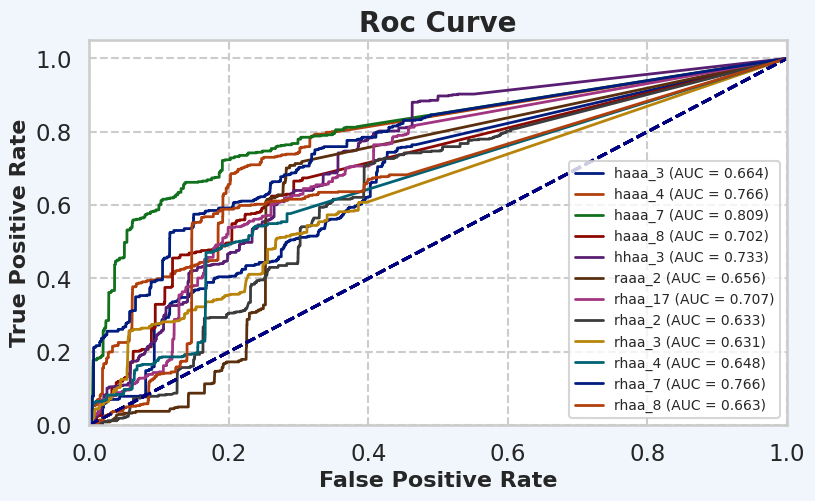

In [13]:

auto = autoph4result(path = path, ref=dekois, scores = 'rmsd', active = 'Active', ID = 'ID', 
                     rescore = 'minmax', auc_thresh = 0.6, figsize = (9,5))
auto.compare_model_multi()

In [10]:
%pwd

'/home/labhhc/Documents/Project/CADD_package/Molph4/Data/Raw_result'

In [11]:
os.chdir('/home/labhhc/Documents/Project/CADD_package/Molph4/Ph4')